1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as scp
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy.stats import norm
import pandas as pd

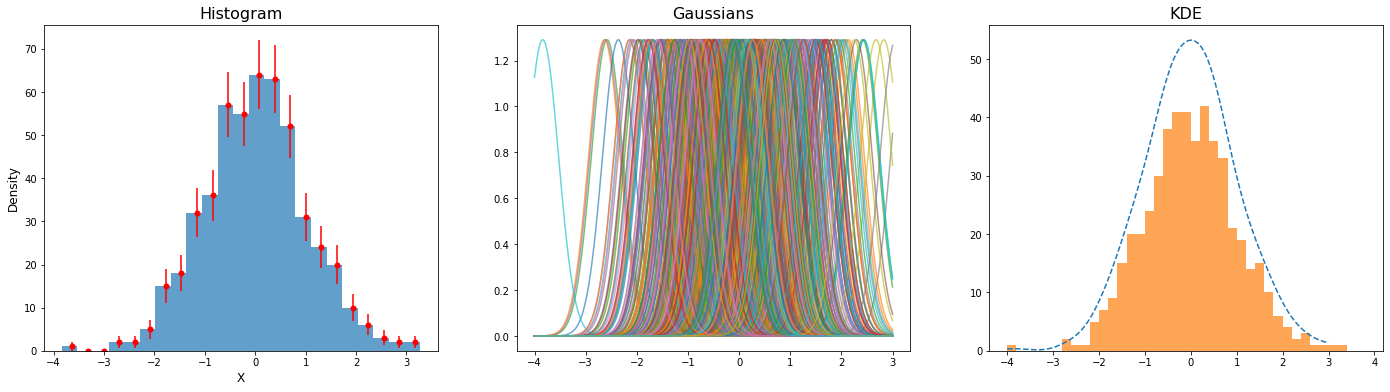

In [131]:
#Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
mean = 0
std = 1
N = 500
x = np.array(std*np.random.randn(N+mean))

#Fill an histogram in pyplot taking properly care about the aesthetic
figure, (fig, fig1, fig2) = plt.subplots(1, 3, figsize=(24, 6))
bin_step=0.27
##Number of bins should be the sqrt of N, rounded up.
counts, bins, bars = fig.hist(x, bins = (int(np.sqrt(500))+1), alpha=0.7)
fig.set_xlabel("X",fontsize = 12)
fig.set_title('Histogram',fontsize=16)
fig.set_ylabel("Density",fontsize=12)
bins = bins[1:]
fig.errorbar(bins-0.1, counts, yerr=np.sqrt(counts), marker='.', c='red', linestyle='None',mew = 3)

#For every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned.
std = 1.06*x.std()*x.size**-0.2
lsp = np.linspace(int(x.min()-0.5),int(x.max()+0.5),200)
gaussians = np.array([norm(i,std).pdf(lsp) for i in x])

#In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
fig1.set_title("Gaussians",fontsize = 16)
for i in gaussians: 
     fig1.plot(lsp, i,alpha=0.65,linestyle = "solid")

#Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method
gauss_sum = np.sum(gaussians, axis = 0)
gauss_sum= (gauss_sum*bin_step*N)/scp.integrate.trapz(gauss_sum, lsp)
fig2.plot(lsp, gauss_sum, linestyle = "dashed")
fig2.set_title("KDE", fontsize = 16)
fig2.hist(x, bins = np.arange(int(x.min()-1),int(x.max()+1),0.2), label = 'x', alpha=0.7);
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

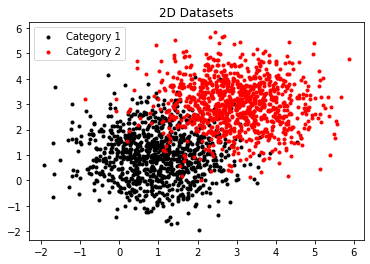

In [183]:
N = 1000

def gauss(mu, sigma):
    x = np.random.normal(loc = mu, scale = sigma, size = N)
    y = np.random.normal(loc = mu, scale = sigma, size = N)
    return (x, y)

x1,y1 = gauss(1,1)
x2,y2 = gauss(3,1)

plt.scatter(x1,y1, c = 'black', marker = ".")
plt.scatter(x2,y2, c = 'red', marker = ".")
plt.legend(['Category 1','Category 2'], loc = "best")
plt.title("2D Datasets")
plt.show()

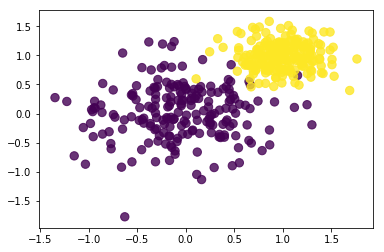

In [3]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

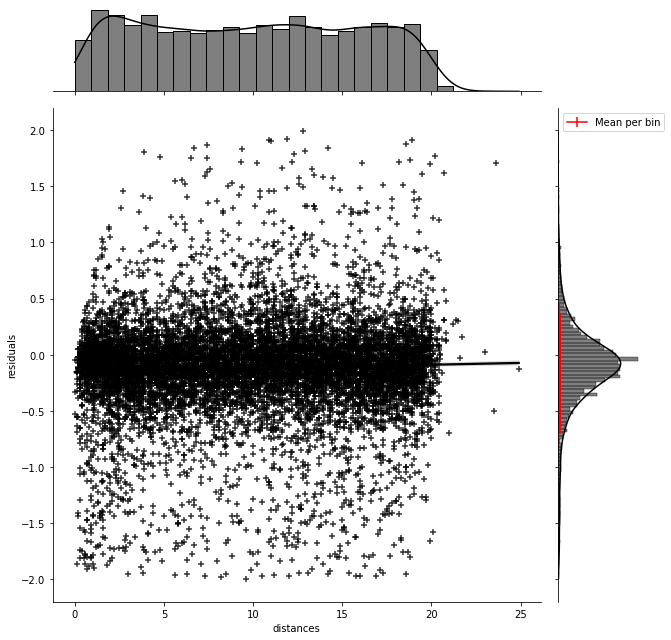

In [232]:
import numpy as np
import pandas as pd
import seaborn as sns

# loading the dataset from the file
data = np.load("residuals_261.npy", allow_pickle=True)
df = pd.DataFrame(data.item())

# cleaning the df
df = df[np.abs(df['residuals'])<2]

# linear regression of residuals vs distances
lin_regr = stats.linregress(df['distances'], df['residuals'])

# seaborn jointplot
seaplot = sns.jointplot(x='distances', y='residuals', data=df, kind='reg', marker='+', label="Measures",height = 9, ratio = 5, color = "black")

# fill 3 numpy arrays
x = np.linspace(0, 20, 60)
y = [ np.mean(df[np.logical_and(df['distances']<x[i], df['distances']>x[i-1])]['residuals'].values ) for i in range(1, x.size)]
erry = [ np.std(df[np.logical_and(df['distances']<x[i], df['distances']>x[i-1])]['residuals'].values ) for i in range(1, x.size)]

# profile 
plt.errorbar((x[1:]+x[:-1])/2, y, yerr=erry, color='r', label="Mean per bin")
plt.legend()